In [291]:
import numpy as np
import cv2
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json

In [292]:
data_dir = './../../data/' # Set this to your value

mask = cv2.imread(data_dir + 'mask.png',0)
folder = data_dir + 'train/train-1-0/' # showing content for one folder only for now
homographies = json.loads(open(folder + 'homographies.json', 'r').read())

images = []
files = np.array(glob(folder + '*.png'))
files = np.sort(np.array(list(map(lambda f: os.path.basename(f), files))))

# files = files[0:10] #uncomment to see one timestep

original_images = []
warped_images = []
for i, image in enumerate(map(lambda i: folder + i, list(files))):
    res = None
    img = cv2.imread(image)
    w, h, _ = img.shape
    res = cv2.bitwise_and(img,img,mask = mask) # mask
#     res = res[200: h - 201, 0:w - 1] #crop, don't apply as warped images are skewed

    w, h, _ = img.shape
    image_name = files[i].replace('.png', '')
    M = np.array(homographies[image_name])

    original_images.append(res)
    res = cv2.warpPerspective(res, M, (w, h))
    warped_images.append(res)
images = np.array(images)


In [293]:
def show_images(images: np.ndarray, figsize=None, resize_dim=(200, 200)):
    if figsize:
        n_row, n_col = figsize
    else:
        n_row = 1
        n_col = 1
        
    figure, axs = plt.subplots(n_row, n_col, figsize=figsize)
    if n_row > 1 or n_col > 1:
        axs = axs.flatten()
    else:
        axs = [axs]
    
    figure.set_figwidth(20)
    figure.set_figheight(15)
    
    for img, ax in zip(images, axs):
        ax.imshow(cv2.resize(img, resize_dim), interpolation='nearest')
        
    plt.show()
    
def merge_images(images: np.ndarray):
    main_camera_img = images[0]
    
#     for img in images[1:]:
#         main_camera_img = cv2.addWeighted(main_camera_img, 0.5, img, 0.5, 0)
    
    # use simple mean instead of alpha blending as suggested in the lecture
    
    main_camera_img = np.mean(images, axis=0).astype(np.uint8)

    
    return main_camera_img

(7, 1024, 1024, 3)


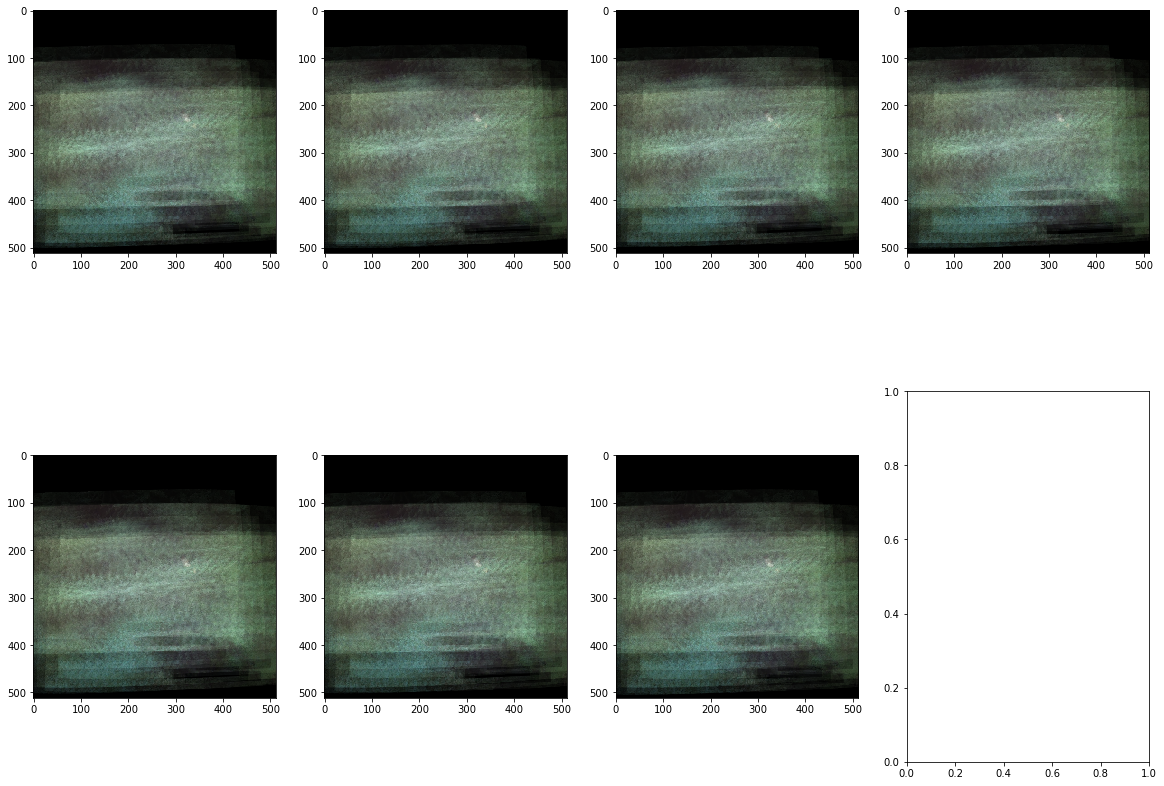

In [294]:
#view merged images
merged_images = merge_images(np.array_split(warped_images, 10))

show_images(np.array(merged_images), resize_dim=(512, 512), figsize=(2,4))

(70, 1024, 1024, 3)


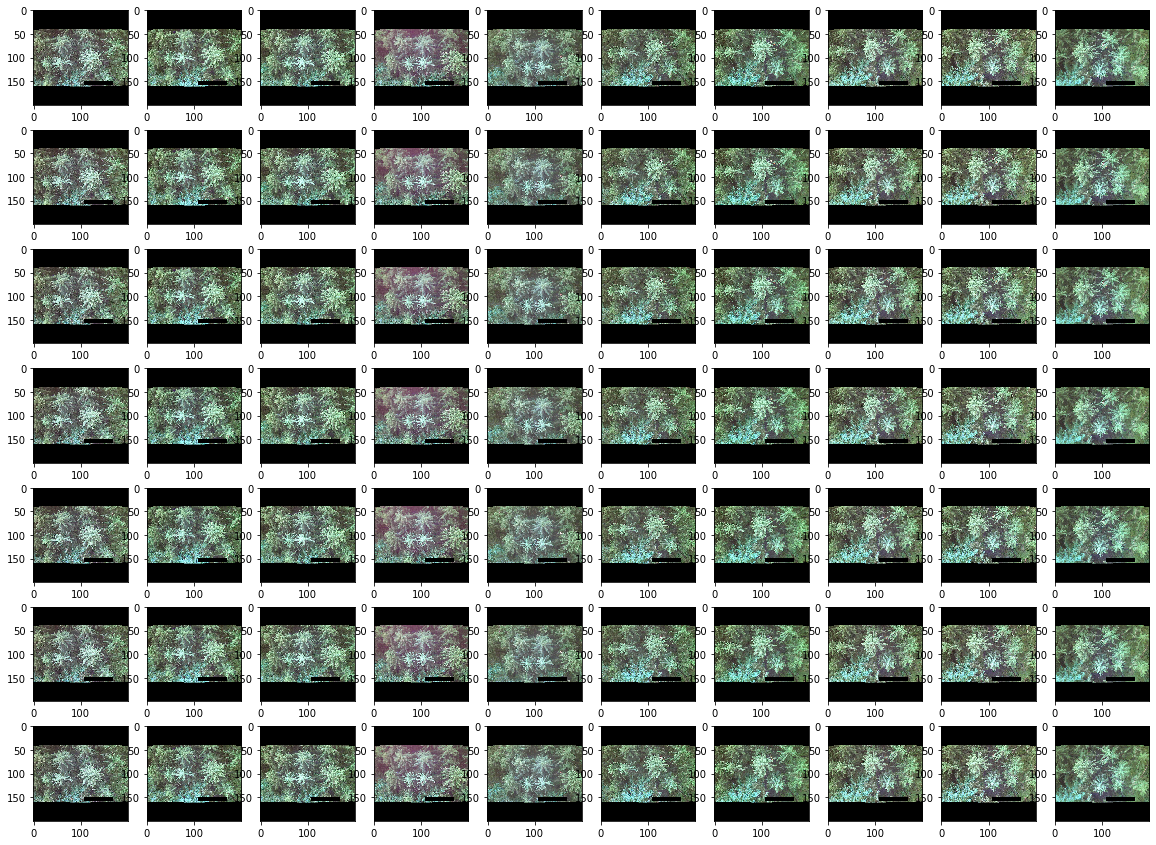

(70, 1024, 1024, 3)


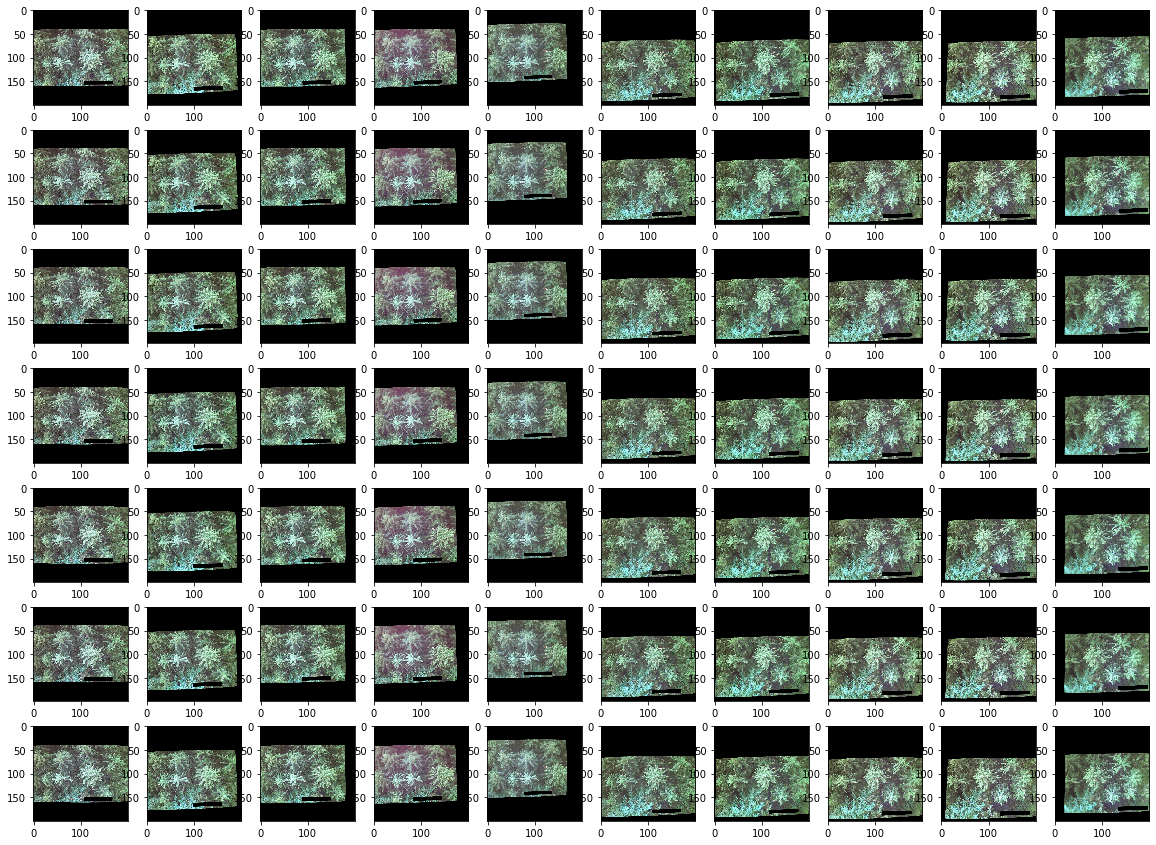

In [297]:
# uncommert to view original or warped images
#show_images(np.array(original_images), figsize=(7, 10), resize_dim=(200, 200))
#show_images(np.array(warped_images), figsize=(7, 10), resize_dim=(200, 200))